In [3]:
# Punto --> Limpieza variables Numericas! ✅

In [4]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [5]:
df = pd.read_csv('df_superlimpiooo.csv')
df.sample(10)

,employeenumber,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,remotework
495,2770.0,34,No,NaN,878.0,10,4,NaN,4,Male,43,3,1,research scientist,3,divorced,38150.0,5972,1,Yes,17,3.0,4,1,NaN,4,4.0,5,2,0,1989,Yes
561,17680.0,42,No,travel rarely,855.0,12,3,medical,2,Male,57,3,1,laboratory technician,2,divorced,27660.0,8952,8,No,22,4.0,2,3,7.0,6,2.0,5,0,4,1981,Yes
27,10420.0,36,Yes,travel rarely,885.0,16,4,NaN,3,Female,43,4,1,laboratory technician,1,single,NaN,8269,1,NaN,16,3.0,3,0,18.0,1,3.0,17,15,14,1987,Yes
0,1620.0,51,No,NaN,684.0,6,3,NaN,1,Male,51,3,5,research director,3,NaN,195370.0,6462,7,No,13,3.0,3,0,NaN,5,3.0,20,15,15,1972,Yes
344,19510.0,34,No,travel rarely,1239.0,13,4,medical,4,Male,39,3,3,sales executive,3,divorced,NaN,22914,1,No,18,3.0,3,1,9.0,2,2.0,8,1,1,1989,Yes
71,20160.0,32,No,travel rarely,NaN,31,4,NaN,31,Female,48,3,3,sales executive,4,NaN,104220.0,24032,1,No,19,3.0,3,2,14.0,3,3.0,14,5,7,1991,Yes
353,20350.0,34,No,NaN,704.0,28,3,marketing,4,Female,95,2,2,sales executive,3,married,67120.0,8978,1,No,21,4.0,4,2,8.0,2,3.0,8,1,7,1989,No
100,12520.0,31,No,travel rarely,1062.0,24,3,medical,3,Female,96,2,2,healthcare representative,1,single,NaN,17198,1,No,19,NaN,2,0,10.0,2,3.0,10,1,8,1992,No
437,8950.0,31,No,NaN,1222.0,11,4,NaN,4,Male,48,3,1,research scientist,4,NaN,NaN,14871,3,NaN,19,3.0,2,1,NaN,2,3.0,6,0,2,1992,Yes
1049,17310.0,47,No,non travel,543.0,2,4,marketing,3,Male,87,3,2,sales executive,2,NaN,NaN,3536,7,No,11,3.0,4,1,4.0,3,1.0,1,0,0,1976,Yes


In [6]:
df.shape

(1080, 32)

In [7]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['employeenumber', 'dailyrate', 'monthlyincome', 'performancerating',
       'totalworkingyears', 'worklifebalance'],
      dtype='object')


In [8]:
#funcion para calcular el porcentaje de valores nulos en las variables categoricas
def calcular_porcentaje_nulos(df, columnas_categoricas):
    porcentaje_nulos = {}
    for columna in columnas_categoricas:
        # Calcular el número de valores nulos
        nulos = df[columna].isnull().sum()
        # Calcular el porcentaje de valores nulos
        porcentaje = (nulos / len(df)) * 100
        # Guardar el resultado en el diccionario
        porcentaje_nulos[columna] = porcentaje
    return porcentaje_nulos

In [9]:
# Lista de columnas categóricas
columnas_categoricas = ['dailyrate', 'worklifebalance', 'performancerating', 'totalworkingyears', 'monthlyincome']

In [10]:
porcentajes_nulos = calcular_porcentaje_nulos(df, columnas_categoricas)

for columna, porcentaje in porcentajes_nulos.items():
    print(f"{columna}: {porcentaje:.2f}%")

dailyrate: 7.87%
worklifebalance: 6.39%
performancerating: 12.69%
totalworkingyears: 33.33%
monthlyincome: 51.85%


In [11]:
# Lista de columnas específicas de interés
columnas_especificas = ['dailyrate', 'worklifebalance', 'performancerating', 'totalworkingyears', 'monthlyincome']

# Asegurarse de que las columnas existen en el DataFrame
columnas_especificas = [col for col in columnas_especificas if col in df.columns]

# Mostrar la mediana y la media para cada columna específica
for col in columnas_especificas:
    print(f"Mediana y Media para la columna {col.upper()}:")
    mediana = df[col].median()
    media = df[col].mean()
    print(f"Mediana: {mediana}")
    print(f"Media: {media}")
    print("........................")


Mediana y Media para la columna DAILYRATE:
Mediana: 798.0
Media: 803.129648241206
........................
Mediana y Media para la columna WORKLIFEBALANCE:
Mediana: 3.0
Media: 2.7665677546983183
........................
Mediana y Media para la columna PERFORMANCERATING:
Mediana: 3.0
Media: 3.1527041357370096
........................
Mediana y Media para la columna TOTALWORKINGYEARS:
Mediana: 10.0
Media: 11.25
........................
Mediana y Media para la columna MONTHLYINCOME:
Mediana: 48620.0
Media: 64639.230769230766
........................


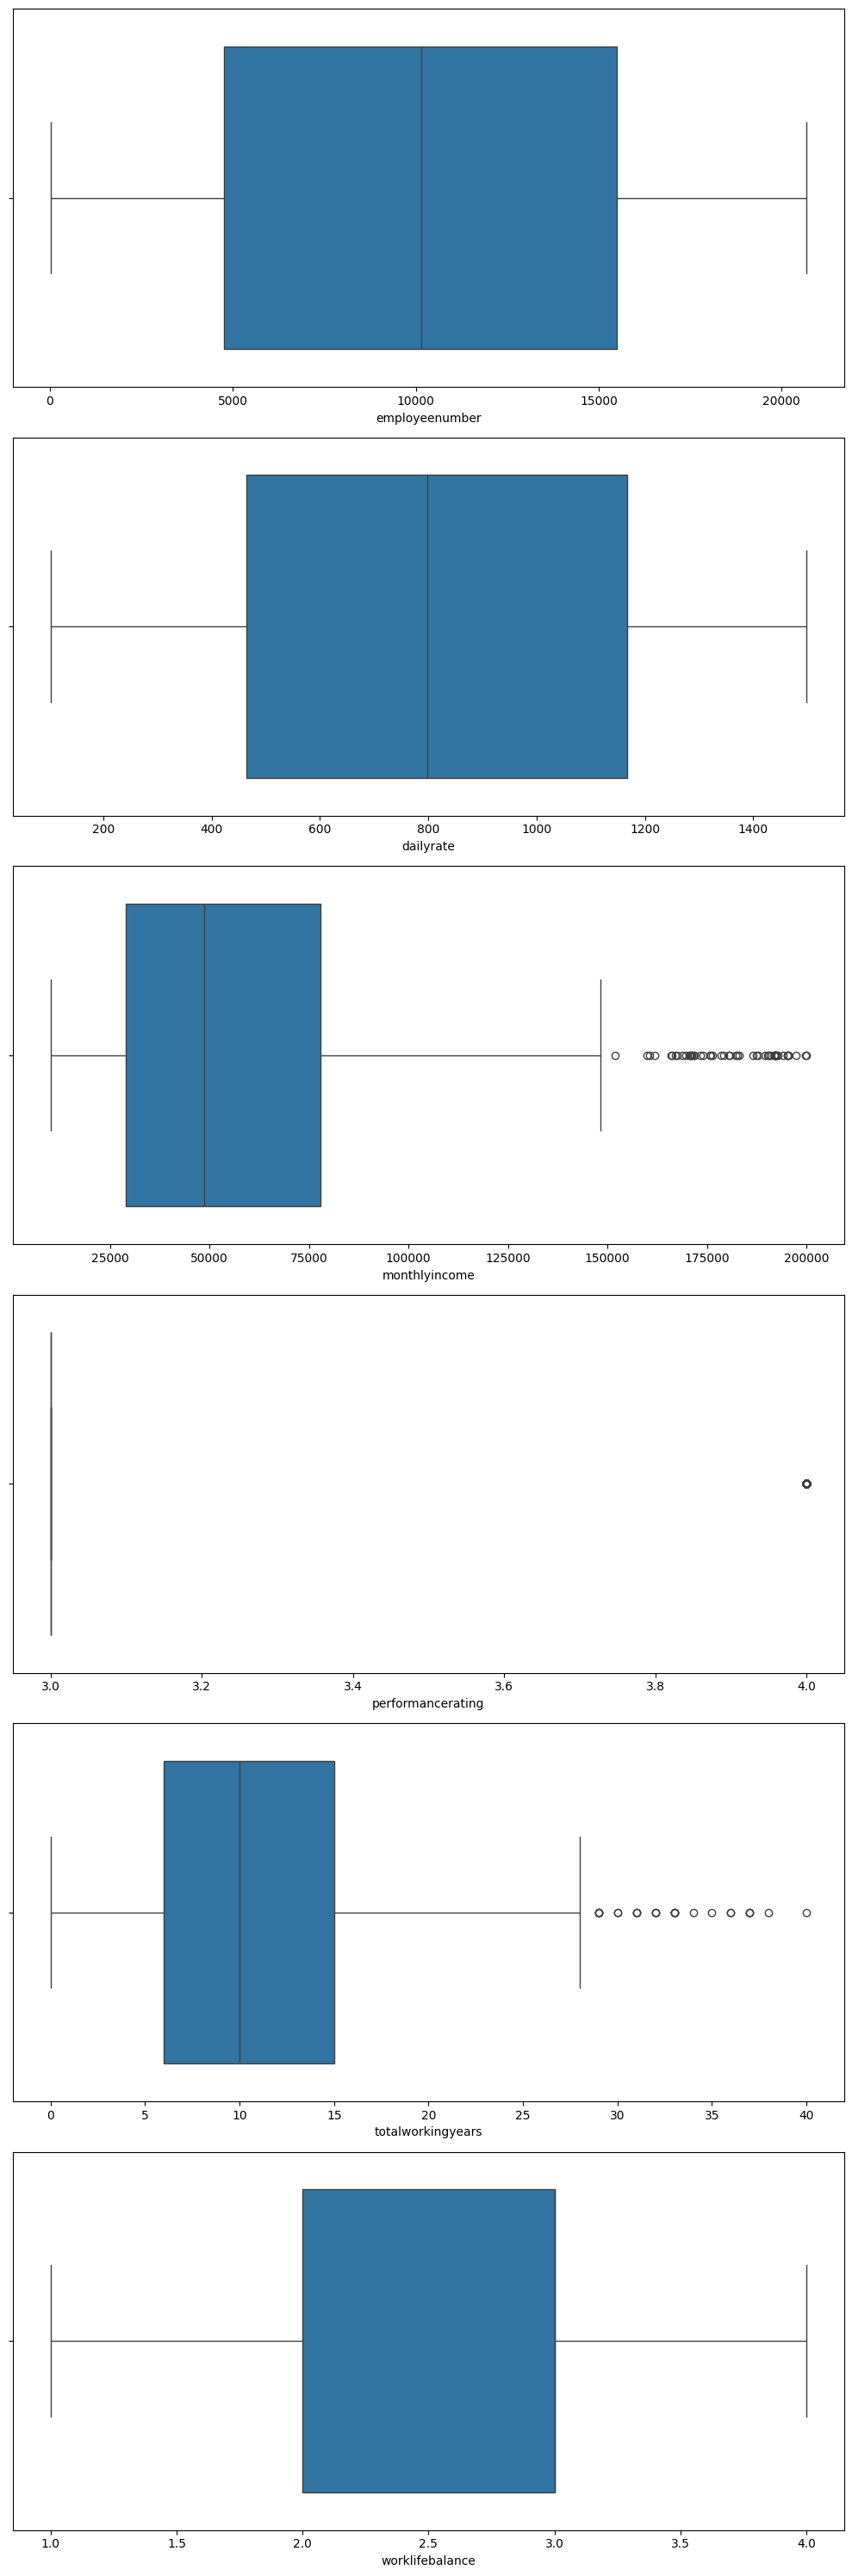

In [12]:
# Crear gráficos de caja para las columnas numéricas con valores nulos
fig, axes = plt.subplots(nrows=len(nulos_esta_num), ncols=1, figsize=(10, 5*len(nulos_esta_num)))
axes = axes.flatten()

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x=col, data=df, ax=axes[indice])

plt.tight_layout()
plt.show()


#### Reviso mis tres columnas

In [13]:
df['dailyrate'].isnull().sum()

85

In [14]:
df['dailyrate'].unique()

array([ 684.,  699.,  532.,  359.,  117., 1435.,  635.,  840.,  247.,
       1360., 1398.,  286., 1238.,  515.,  202.,  429.,   nan, 1180.,
       1282.,  776.,  526., 1034., 1403.,  580.,  859., 1376.,  885.,
       1003., 1321.,  394., 1372.,  228.,  823.,  667.,  573.,  630.,
       1063., 1017., 1296.,  939., 1355., 1448.,  200., 1202.,  465.,
       1189., 1394.,  161.,  288.,  682., 1354.,  119.,  452.,  480.,
       1099.,  672.,  583., 1050., 1440., 1291., 1157., 1336.,  735.,
       1389., 1240.,  194., 1339.,  111.,  470., 1232.,  549.,  570.,
        541.,  164., 1117.,  619.,  956., 1245., 1397.,  527.,  213.,
        882.,  330.,  406.,  481.,  669., 1062.,  177., 1199.,  412.,
        282.,  770.,  601.,  332., 1326.,  748.,  790.,  971., 1370.,
        750.,  880.,  678., 1179.,  574.,  692.,  310.,  722.,  721.,
        427.,  852., 1334., 1093.,  967.,  989., 1195., 1045.,  829.,
        663., 1300.,  906.,  849., 1275., 1218.,  422., 1274., 1076.,
       1207.,  430.,

------

In [15]:
df['performancerating'].isnull().sum()

137

In [16]:
df['performancerating'].unique()

array([ 3.,  4., nan])

In [17]:
df['performancerating'].value_counts()

performancerating
3.0    799
4.0    144
Name: count, dtype: int64

------

In [18]:
df['worklifebalance'].isnull().sum()

69

In [19]:
df['worklifebalance'].unique()

array([ 3., nan,  2.,  4.,  1.])

In [20]:
df['worklifebalance'].value_counts()

worklifebalance
3.0    615
2.0    238
4.0    106
1.0     52
Name: count, dtype: int64

#### `Cambio los nulos por la media porque no tienen valores atipicos`

In [62]:
# Lista de columnas específicas de interés
columnas_3 = ['dailyrate', 'worklifebalance', 'performancerating']

# Asegurarse de que las columnas existen en el DataFrame
columnas_3 = [col for col in columnas_3 if col in df.columns]

# Calcular la media para cada columna específica y rellenar los valores nulos
for col in columnas_3:
    media = df[col].mean()
    df[col].fillna(media, inplace=True)
    df[col] = df[col].round(1)  
# Comprobar los nulos para cada columna específica
for col in columnas_3:
    print(f"Después del 'fillna' la columna {col.upper()} tiene {df[col].isnull().sum()} nulos")


Después del 'fillna' la columna DAILYRATE tiene 0 nulos
Después del 'fillna' la columna WORKLIFEBALANCE tiene 0 nulos
Después del 'fillna' la columna PERFORMANCERATING tiene 0 nulos


C:\Users\jecar\AppData\Local\Temp\ipykernel_9412\3355400587.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(media, inplace=True)


In [68]:
df.head(35)

,employeenumber,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,remotework
0,1620,51,No,travel rarely,684.0,6,3,life sciences,1,Male,51,3,5,research director,3,married,195370.0,6462,7,No,13,3.0,3,0,10.0,5,3.0,20,15,15,1972,Yes
1,2590,52,No,travel rarely,699.0,1,4,life sciences,3,Male,65,2,5,manager,3,married,199990.0,5678,0,No,14,3.0,1,1,34.0,5,3.0,33,11,9,1971,Yes
2,3190,42,No,travel rarely,532.0,4,2,technical degree,3,Male,58,3,5,manager,4,married,192320.0,4933,1,No,11,3.0,4,0,22.0,3,2.8,22,11,15,1981,Yes
3,20681,47,No,travel rarely,359.0,2,4,medical,1,Female,82,3,4,research director,3,married,171690.0,26703,3,No,19,3.0,2,2,10.0,2,2.8,20,5,6,1976,No
4,19000,48,No,travel rarely,117.0,22,3,medical,4,Female,58,3,4,manager,4,married,171740.0,2437,3,No,11,3.0,2,1,10.0,3,3.0,22,4,7,1975,Yes
5,810,59,No,travel rarely,1435.0,25,3,life sciences,1,Female,99,3,3,sales executive,1,married,48620.0,2354,7,No,11,3.0,4,0,28.0,3,2.0,21,7,9,1964,Yes
6,3870,42,No,travel rarely,635.0,1,1,life sciences,2,Male,99,3,2,sales executive,3,married,48620.0,24532,1,No,25,4.0,3,0,20.0,3,3.0,20,11,6,1981,No
7,9990,41,No,travel frequently,840.0,9,3,life sciences,1,Male,64,3,5,research director,3,married,48620.0,3735,2,No,17,3.0,2,1,21.0,2,4.0,18,0,11,1982,No
8,10350,41,No,non travel,247.0,7,1,life sciences,2,Female,55,1,5,research director,3,married,199730.0,20284,1,No,22,4.0,2,2,10.0,3,3.0,21,5,10,1982,No
9,580,41,Yes,travel rarely,1360.0,12,3,life sciences,2,Female,49,3,5,research director,3,married,195450.0,16280,1,No,12,3.0,4,0,10.0,0,3.0,22,15,8,1982,No


Columna totalworkingyears - Se concluye que los nulos se cambiarán por la Mediana ya que tenemos valores atípicos

In [22]:
df['totalworkingyears'].isnull().sum()

360

In [23]:
df['totalworkingyears'].value_counts()

totalworkingyears
10.0    99
6.0     57
8.0     49
9.0     48
5.0     47
7.0     37
1.0     36
4.0     35
12.0    23
14.0    22
3.0     21
20.0    21
15.0    20
11.0    18
13.0    17
21.0    17
16.0    16
18.0    16
17.0    15
2.0     13
22.0    12
19.0    11
23.0    11
26.0     8
24.0     7
28.0     7
0.0      5
29.0     4
33.0     4
25.0     4
32.0     3
31.0     3
37.0     3
27.0     3
36.0     2
30.0     2
35.0     1
38.0     1
40.0     1
34.0     1
Name: count, dtype: int64

In [24]:
df['totalworkingyears'].describe()

count    720.000000
mean      11.250000
std        7.567499
min        0.000000
25%        6.000000
50%       10.000000
75%       15.000000
max       40.000000
Name: totalworkingyears, dtype: float64

In [25]:
# Calcular la mediana de la columna 'totalworkingyears' y rellenar los valores nulos
mediana = df['totalworkingyears'].median()
df['totalworkingyears'].fillna(mediana, inplace=True)

# Comprobar los nulos para cada columna específica
print(f"Después del 'fillna' la columna 'totalworkingyears' tiene {df['totalworkingyears'].isnull().sum()} nulos")

Después del 'fillna' la columna 'totalworkingyears' tiene 0 nulos


C:\Users\jecar\AppData\Local\Temp\ipykernel_9412\2626467184.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['totalworkingyears'].fillna(mediana, inplace=True)


Columna employeenumber 

In [26]:
df.columns

Index(['employeenumber', 'age', 'attrition', 'businesstravel', 'dailyrate',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'datebirth', 'remotework'],
      dtype='object')

In [27]:
df['employeenumber'].isnull().sum()

1

In [28]:
df['employeenumber'].describe()

count     1079.000000
mean     10179.351251
std       6057.029798
min         20.000000
25%       4765.000000
50%      10150.000000
75%      15495.000000
max      20680.000000
Name: employeenumber, dtype: float64

Como employeenumber es una columna que nos puede indicar un valor unico para cada registro, asignaremos valores nuevos a los nulos

In [29]:
# Encontrar el valor máximo actual de 'employeenumber'
max_value = df['employeenumber'].max()

# Generar nuevos números únicos para los valores nulos
null_indices = df['employeenumber'].isnull()
df.loc[null_indices, 'employeenumber'] = range(int(max_value) + 1, int(max_value) + 1 + null_indices.sum())

# Convertir la columna 'employeenumber' a tipo int nuevamente, en caso de que se haya convertido a float
df['employeenumber'] = df['employeenumber'].astype(int)

# Verificar el resultado
print(df.head())

   employeenumber  age attrition businesstravel  dailyrate  distancefromhome  \
0            1620   51        No            NaN      684.0                 6   
1            2590   52        No            NaN      699.0                 1   
2            3190   42        No  travel rarely      532.0                 4   
3           20681   47        No  travel rarely      359.0                 2   
4           19000   48        No            NaN      117.0                22   

   education    educationfield  environmentsatisfaction  gender  hourlyrate  \
0          3               NaN                        1    Male          51   
1          4     life sciences                        3    Male          65   
2          2  technical degree                        3    Male          58   
3          4           medical                        1  Female          82   
4          3           medical                        4  Female          58   

   jobinvolvement  joblevel              job

Columna monthlyincome- Se concluye que los nulos se cambiarán por la Mediana ya que tenemos valores atípicos // discutir, es un 52%

In [30]:
df['monthlyincome'].isnull().sum() / df.shape[0]

0.5185185185185185

In [31]:
df['monthlyincome'].describe()

count       520.000000
mean      64639.230769
std       47966.341766
min       10090.000000
25%       29077.500000
50%       48620.000000
75%       77822.500000
max      199990.000000
Name: monthlyincome, dtype: float64

In [32]:
# Calcular la mediana de la columna 'totalworkingyears' y rellenar los valores nulos
mediana_monthly = df['monthlyincome'].median()
df['monthlyincome'].fillna(mediana_monthly, inplace = True)

# Comprobar los nulos para cada columna específica
print(f"Después del 'fillna' la columna 'monthlyincome' tiene {df['monthlyincome'].isnull().sum()} nulos")

Después del 'fillna' la columna 'monthlyincome' tiene 0 nulos


C:\Users\jecar\AppData\Local\Temp\ipykernel_9412\3512079184.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['monthlyincome'].fillna(mediana_monthly, inplace = True)


In [33]:
# Punto --> Limpieza variables Categoricas! ✅

In [34]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['businesstravel', 'educationfield', 'maritalstatus', 'overtime'], dtype='object')


In [35]:
#funcion para calcular el porcentaje de valores nulos en las variables categoricas
def calcular_porcentaje_nulos(df, columnas_categoricas):
    porcentaje_nulos = {}
    for columna in columnas_categoricas:
        # Calcular el número de valores nulos
        nulos = df[columna].isnull().sum()
        # Calcular el porcentaje de valores nulos
        porcentaje = (nulos / len(df)) * 100
        # Guardar el resultado en el diccionario
        porcentaje_nulos[columna] = porcentaje
    return porcentaje_nulos

In [36]:
# Lista de columnas categóricas
columnas_categoricas = ['businesstravel', 'educationfield', 'maritalstatus', 'overtime']

In [37]:
porcentajes_nulos = calcular_porcentaje_nulos(df, columnas_categoricas)

for columna, porcentaje in porcentajes_nulos.items():
    print(f"{columna}: {porcentaje:.2f}%")

businesstravel: 49.44%
educationfield: 45.93%
maritalstatus: 39.35%
overtime: 41.39%


In [38]:
#Según los porcentajes de las categorías, si hay una categoría dominante reemplazamos por la moda, de lo contrario indicamos que pertenece a la categoría 'unknown'(desconocido)

# educationfield :categoría 'Desconocido' porque tiene casi 47% de nulos.

# maritalstatus categoría 'Desconocido' porque tiene un 40% de nulos. 

#overtime: categoría 'Desconocido' porque tiene un 40% de nulos. 

In [39]:
def reemplazar_nulos_por_moda(df, columnas_categoricas):
    for columna in columnas_categoricas:
        # Calcular la moda de la columna
        moda = df[columna].mode()[0]
        # Reemplazar los valores nulos por la moda
        df[columna] = df[columna].fillna(moda)
    return df

In [40]:
df = reemplazar_nulos_por_moda(df, columnas_categoricas)

In [41]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index([], dtype='object')


In [42]:
df.head(5)

,employeenumber,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,remotework
0,1620,51,No,travel rarely,684.0,6,3,life sciences,1,Male,51,3,5,research director,3,married,195370.0,6462,7,No,13,3.0,3,0,10.0,5,3.000000,20,15,15,1972,Yes
1,2590,52,No,travel rarely,699.0,1,4,life sciences,3,Male,65,2,5,manager,3,married,199990.0,5678,0,No,14,3.0,1,1,34.0,5,3.000000,33,11,9,1971,Yes
2,3190,42,No,travel rarely,532.0,4,2,technical degree,3,Male,58,3,5,manager,4,married,192320.0,4933,1,No,11,3.0,4,0,22.0,3,2.766568,22,11,15,1981,Yes
3,20681,47,No,travel rarely,359.0,2,4,medical,1,Female,82,3,4,research director,3,married,171690.0,26703,3,No,19,3.0,2,2,10.0,2,2.766568,20,5,6,1976,No
4,19000,48,No,travel rarely,117.0,22,3,medical,4,Female,58,3,4,manager,4,married,171740.0,2437,3,No,11,3.0,2,1,10.0,3,3.000000,22,4,7,1975,Yes


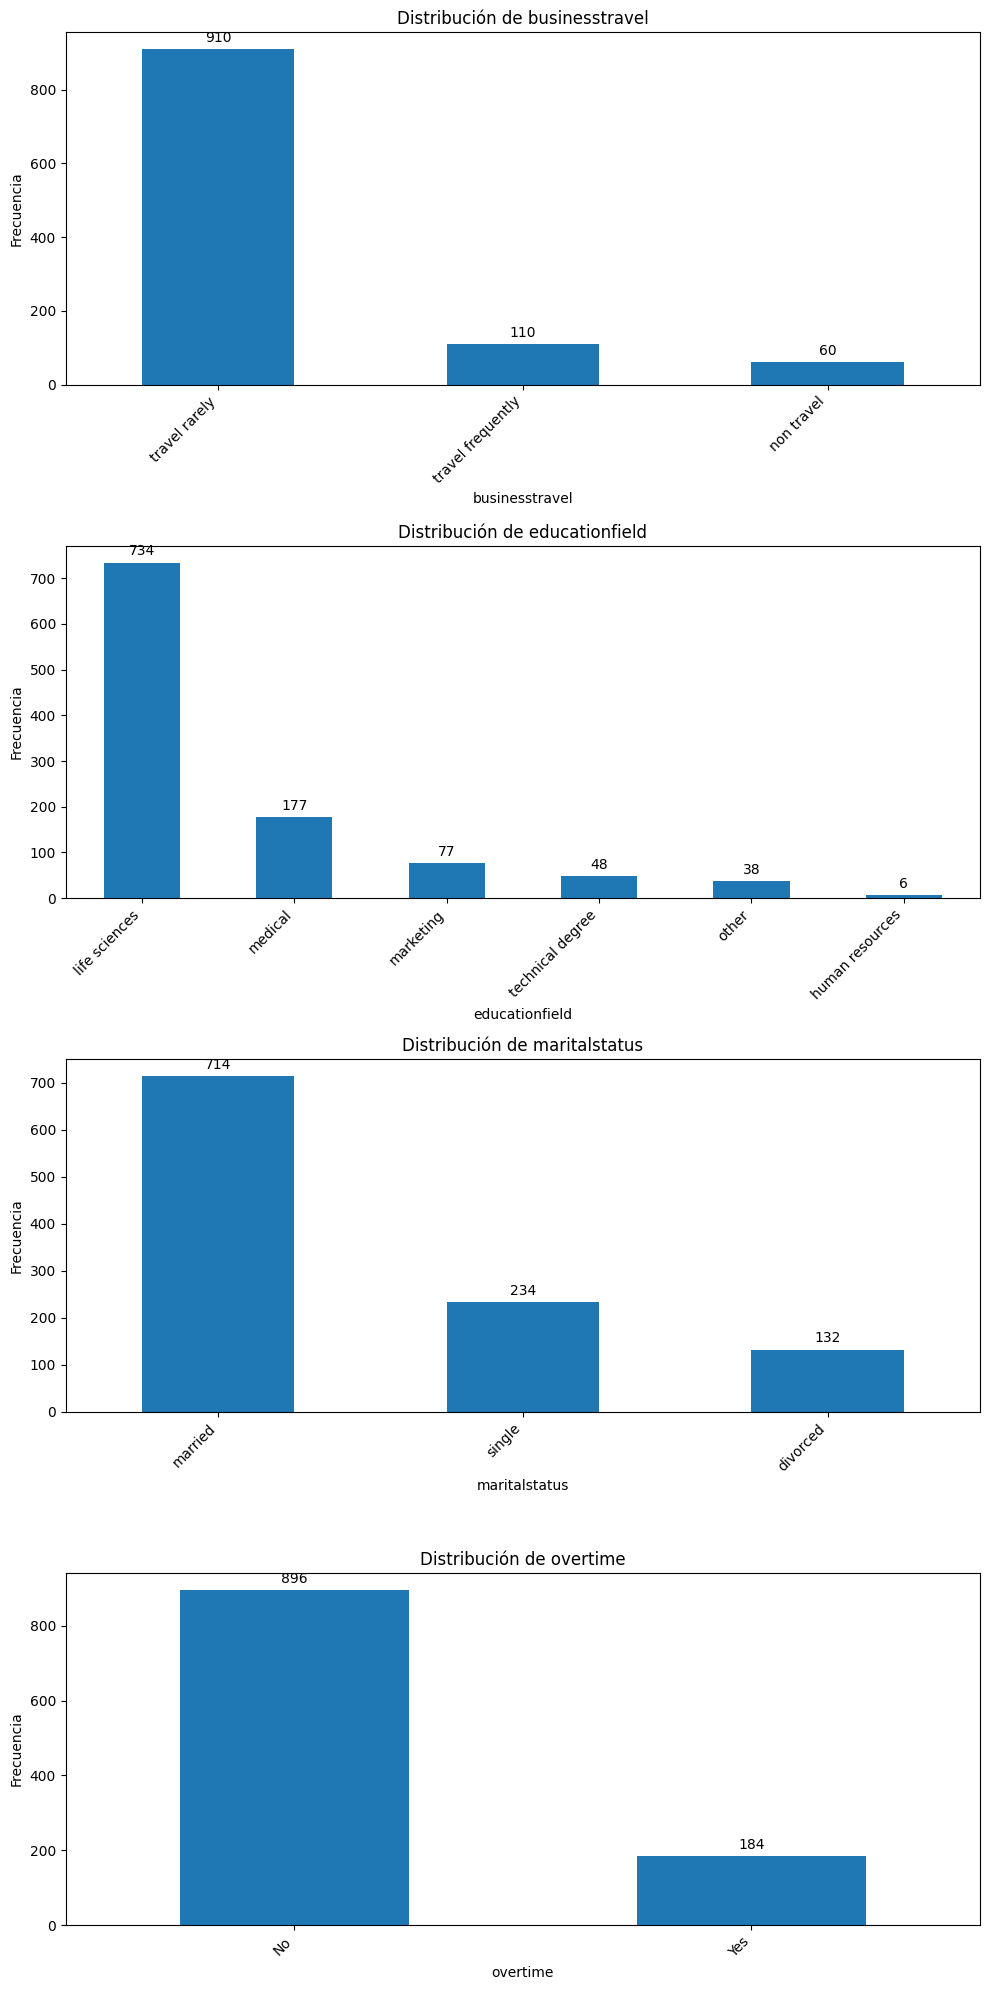

In [43]:
def graficar_variables_categoricas(df, columnas_categoricas):
    # Ajuste general para los gráficos
    fig, axes = plt.subplots(nrows=len(columnas_categoricas), ncols=1, figsize=(10, 5 * len(columnas_categoricas)))

    # Si solo hay una columna categórica, axes no será una lista, así que lo convertimos a lista
    if len(columnas_categoricas) == 1:
        axes = [axes]

    for ax, columna in zip(axes, columnas_categoricas):
        # Contar los valores
        conteo = df[columna].value_counts()
        # Crear gráfico de barras
        barras = conteo.plot(kind='bar', ax=ax)
        ax.set_title(f'Distribución de {columna}')
        ax.set_xlabel(columna)
        ax.set_ylabel('Frecuencia')
        ax.set_xticklabels(conteo.index, rotation=45, ha='right')

        # Añadir valores sobre las barras
        for barra in barras.patches:
            ax.annotate(f'{barra.get_height()}', 
                        xy=(barra.get_x() + barra.get_width() / 2, barra.get_height()),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Lista de columnas categóricas
columnas_categoricas = ['businesstravel', 'educationfield', 'maritalstatus', 'overtime']

# Llamar a la función para crear los gráficos de barras
graficar_variables_categoricas(df, columnas_categoricas)


In [44]:
# Guarda el DataFrame como un archivo CSV
df.to_csv("df_sin_nulos.csv", index = False)